# Iris Dataset Exploratory Analysis

---

## Introduction

Quoted from [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. 

A sepal is a part of the flower of angiosperms (flowering plants). Usually green, sepals typically function as protection for the flower in bud, and often as support for the petals when in bloom. Petals are modified leaves that surround the reproductive parts of flowers. They are often brightly colored or unusually shaped to attract pollinators.

Flower morphology:
![image.png](attachment:image.png)

---

## Preliminary Analysis

__Import libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Load iris dataset:

In [3]:
dataset = pd.read_csv('Iris.csv')

In [4]:
# First five data points of dataset
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Last five data points of dataset
dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


From above, we see that our dataset contains 150 data points and 6 features. But we don't need column Id, so we drop them. Then to make our exploratory easier, we rename dataset column names and rename the species to its actual name.

In [6]:
dataset = dataset.drop(columns=['Id'])

In [7]:
dataset.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [8]:
dataset = dataset.replace(to_replace='Iris-setosa', value='Setosa', regex=True)
dataset = dataset.replace(to_replace='Iris-virginica', value='Virginica', regex=True)
dataset = dataset.replace(to_replace='Iris-versicolor', value='Versicolor', regex=True)

In [9]:
# new first five data points
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [10]:
# new last five data points
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


Now, the format of our iris dataset is better.

---

## Descriptive Statistics

Descriptive statistics for overall dataset:

In [11]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


To notice the difference between each species in term of descriptive statistics. We separate the data by its species.

### Iris Setosa

In [12]:
dataset[dataset['species'] == 'Setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


### Iris Versicolor

In [13]:
dataset[dataset['species'] == 'Versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


### Iris Virginica

In [14]:
dataset[dataset['species'] == 'Virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


---

## Visualization

Because of iris dataset is categorical type data and after exploratory analysis we will implement machine learning to iris dataset, in here we will visualize our data with several relational plot for categorical data, which are:
- Pairplot
- Swarmplot
- Boxplot
- Violinplot

### Pairplot

Pairplot gives us knowledge about relationship between features.

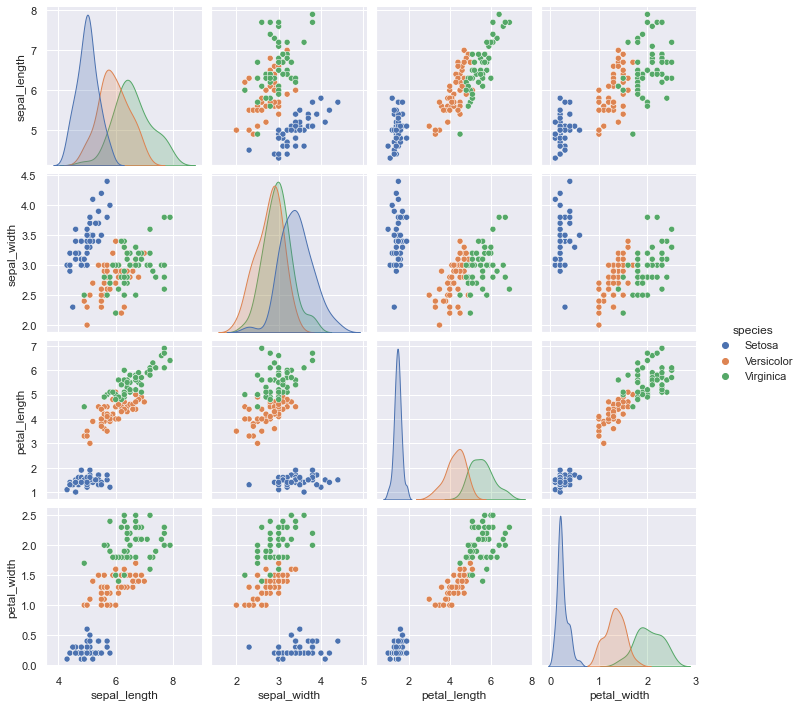

In [15]:
sns.pairplot(data=dataset, hue='species');

### Boxplot

Boxplot gives us knowledge about range of data and outliers.

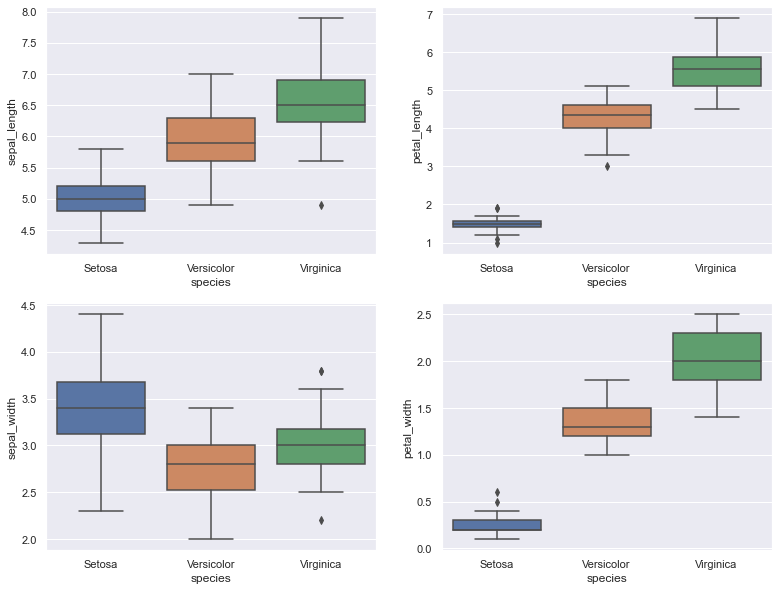

In [16]:
f, axes = plt.subplots(2, 2, figsize=(13, 10))
sns.boxplot(x='species', y='sepal_length', data=dataset, ax= axes[0, 0])
sns.boxplot(x='species', y='petal_length', data=dataset, ax= axes[0, 1])
sns.boxplot(x='species', y='sepal_width', data=dataset, ax= axes[1, 0])
sns.boxplot(x='species', y='petal_width', data=dataset, ax= axes[1, 1]);

### Swarmplot

Swarmplot gives us knowledge about data points distribution in such good fashion.

C:\Users\mehdi\Anaconda3\envs\iris\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mehdi\Anaconda3\envs\iris\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


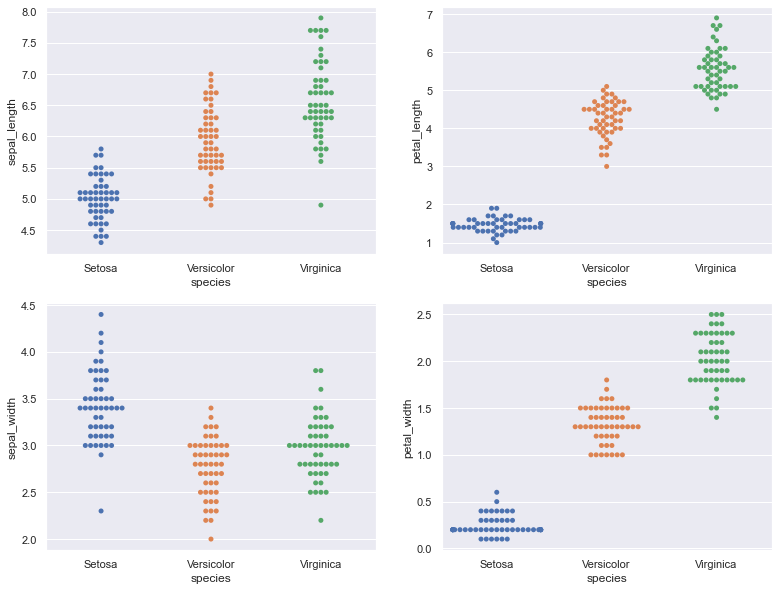

In [17]:
f, axes = plt.subplots(2, 2, figsize=(13, 10))
sns.swarmplot(x='species', y='sepal_length', data=dataset, ax= axes[0, 0])
sns.swarmplot(x='species', y='petal_length', data=dataset, ax= axes[0, 1])
sns.swarmplot(x='species', y='sepal_width', data=dataset, ax= axes[1, 0])
sns.swarmplot(x='species', y='petal_width', data=dataset, ax= axes[1, 1]);

### Violin plot

Violin plot gives knowledge about dataset distribution just like swarm plot.

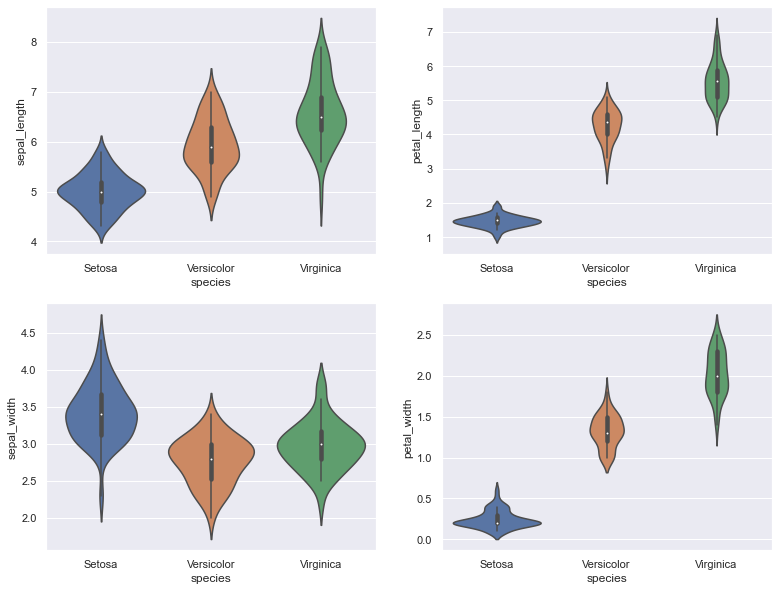

In [18]:
f, axes = plt.subplots(2, 2, figsize=(13, 10))
sns.violinplot(x='species', y='sepal_length', data=dataset, ax= axes[0, 0])
sns.violinplot(x='species', y='petal_length', data=dataset, ax= axes[0, 1])
sns.violinplot(x='species', y='sepal_width', data=dataset, ax= axes[1, 0])
sns.violinplot(x='species', y='petal_width', data=dataset, ax= axes[1, 1]);

## Dump HTML Page

In [0]:
df = dataset.copy()

In [0]:
df.columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Species"]

In [0]:
html = df.to_html()

with open('dataset.html', 'w') as f:
    f.write(html)